# Triaxiality correction

Following the orientation template in the Zhang-Wu-Zhang's draft (Eq. 14) is:

$F(R, \mu) = \ln \frac{\Delta\Sigma (R,\mu)}{\overline{\Delta\Sigma}(R)}$, 

where $\mu=\cos i$, $\Delta\Sigma (R,\mu)$ is the profile in a given orientation and $\overline{\Delta\Sigma}(R)$ is the "measured" average profile.   

If we take the exponential we get:

$\frac{\Delta\Sigma (R,\mu)}{\overline{\Delta\Sigma}(R)} = \exp {F(R, \mu)}$

However, from Eq. 15, we also have that:

$F(R, \mu) = A(\mu) f(R)$,

$A(\mu) = A_0 + A_1 \mu + A_2 \mu^2 + A_3 \mu^3$ and

$f(x\equiv \ln R) = 1 - \frac{1}{(x - x_0)^2 + \gamma}$.

The best-fit for the parameters are given by Table 1:

| Parameter | Value |
|    :-:    |  :-:  |
| $A_0$ | -0.191 |
| $A_1$ | 0.182 |
| $A_2$ | -0.191 |
| $A_3$ | 0.627 |
| $x_0$ | 0.632 |
| $\gamma$ | 1.634 |

Heidi provided me some simulated $\Delta\Sigma$'s, so we could use to test the implementation of the expressions above.

In [1]:
#!/bin/env python

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline

In [2]:
DSpath = './DeltaSigma_for_Maria/'
#files = os.listdir(DSpath)

In [3]:
def A(mu):
    return -0.191 + 0.182 * mu -0.191 * mu**2 + 0.627 * mu**3 

def f(R):
    x = np.log(R) #it's ln not log10
    return 1. - (1./ ( (x-0.632)**2 + 1.634) )

In [4]:
#Reading a file
dsfile   = DSpath + 'DS_M_2e+14_4e+14_z_0_0.34.dat'            #rp[Mpc/h], DeltaSigma[Msun h /pc2] 
dsmufile = DSpath + 'DS_M_2e+14_4e+14_z_0_0.34_cosi_0.8_1.dat' #mu=cosi

r, ds = np.loadtxt(dsfile, unpack=True)
rmu, dsmu = np.loadtxt(dsmufile, unpack=True)

print np.c_[r, ds, rmu, dsmu]

[[1.25893e-01 1.67484e+02 1.25893e-01 2.15694e+02]
 [1.99526e-01 1.41745e+02 1.99526e-01 1.79938e+02]
 [3.16228e-01 1.09689e+02 3.16228e-01 1.36966e+02]
 [5.01187e-01 7.92220e+01 5.01187e-01 9.76729e+01]
 [7.94328e-01 5.39142e+01 7.94328e-01 6.51235e+01]
 [1.25893e+00 3.43401e+01 1.25893e+00 3.97234e+01]
 [1.99526e+00 1.97749e+01 1.99526e+00 2.21475e+01]
 [3.16228e+00 1.00391e+01 3.16228e+00 1.16005e+01]
 [5.01187e+00 4.98660e+00 5.01187e+00 6.06163e+00]
 [7.94328e+00 2.79118e+00 7.94328e+00 3.45574e+00]
 [1.25893e+01 1.71323e+00 1.25893e+01 2.09941e+00]
 [1.99526e+01 1.09489e+00 1.99526e+01 1.32538e+00]]


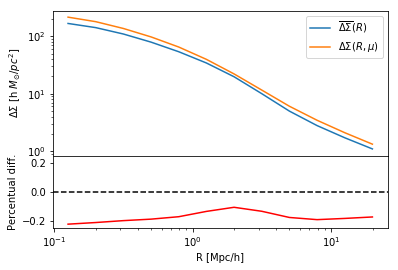

In [5]:
plt.figure(1)
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)
ax0.loglog(r, ds, label=r"$\overline{\Delta\Sigma}(R)$")
ax0.loglog(rmu, dsmu, label=r"$\Delta\Sigma (R,\mu)$")
ax0.legend(loc='upper right')
ax1.semilogx(rmu, (ds - dsmu)/dsmu, 'r')
ax1.set_ylabel("Percentual diff.")
ax1.set_ylim(-0.25, 0.25)
ax1.axhline(y=0, c='k', ls='--')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)
plt.xlabel("R [Mpc/h]")
ax0.set_ylabel("$\Delta\Sigma$ [h $M_{\odot}/pc^2$]")
plt.show()

## Computing $F(R,\mu)$

In [6]:
#F(R,mu) from Heidi simulation
F_sim = dsmu/ds

#F(R,mu) from equations above
mu   = 0.9 #for 0.8<mu<1
F_eq = np.exp(A(mu)*f(r))

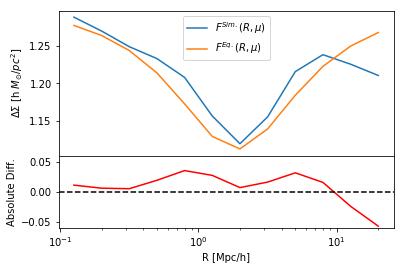

In [7]:
plt.figure(2)
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1], sharex = ax0)

ax0.semilogx(r, F_sim, label=r"$F^{Sim.}(R,\mu)$")
ax0.semilogx(r, F_eq,  label=r"$F^{Eq.}(R,\mu)$")
ax0.legend(loc='upper center')
ax1.semilogx(rmu, (F_sim - F_eq), 'r')
ax1.set_ylabel("Absolute Diff.")
ax1.set_ylim(-0.06, 0.06)
ax1.axhline(y=0, c='k', ls='--')
plt.setp(ax0.get_xticklabels(), visible=False)
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.subplots_adjust(hspace=.0)
plt.xlabel("R [Mpc/h]")
ax0.set_ylabel("$\Delta\Sigma$ [h $M_{\odot}/pc^2$]")
plt.show()

